Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


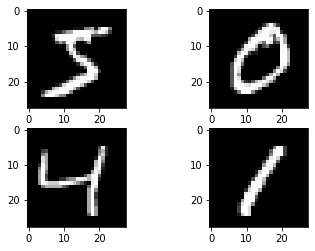

In [38]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
plt.subplots(2)
i=1
for picture in x_train[0:4]:
  plt.subplot(2,2,i)
  plt.imshow(picture, cmap='gray')
  i = i + 1

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

In [39]:
# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_8 (Dropout)         (None, 1600)            

In [40]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# TODO: provedi ucenje mreze
batch_size = 128
epochs = 15
model.fit(x_train_s, y_train_s, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 28s 66ms/step - loss: 0.3580 - accuracy: 0.8906 - val_loss: 0.0796 - val_accuracy: 0.9793
Epoch 2/15
422/422 [==============================] - 29s 68ms/step - loss: 0.1143 - accuracy: 0.9648 - val_loss: 0.0597 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 28s 66ms/step - loss: 0.0861 - accuracy: 0.9737 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 4/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0730 - accuracy: 0.9771 - val_loss: 0.0411 - val_accuracy: 0.9903
Epoch 5/15
422/422 [==============================] - 29s 69ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0382 - val_accuracy: 0.9905
Epoch 6/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0397 - val_accuracy:

In [43]:
# TODO: Prikazi test accuracy i matricu zabune
score = model.evaluate(x_test_s, y_test_s, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02539154514670372
Test accuracy: 0.9921000003814697


In [44]:
y_predict = model.predict(x_test_s)
y_predict = np.argmax(y_predict, 1)
y_test = np.argmax(y_test_s, 1)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

313/313 [==============================] - 2s 6ms/step
[[ 976    0    2    0    0    0    0    1    1    0]
 [   0 1131    2    1    0    0    0    0    1    0]
 [   0    1 1024    0    0    0    0    6    1    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  978    0    0    1    0    3]
 [   1    0    0    6    0  882    1    0    2    0]
 [   4    2    1    0    3    4  943    0    1    0]
 [   0    3    7    1    0    0    0 1014    1    2]
 [   1    0    2    1    0    1    0    0  967    2]
 [   0    1    0    1    2    2    0    3    1  999]]


In [45]:
# TODO: spremi model
model.save('model')

<ipython-input-47-1ccc4288d5da>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)


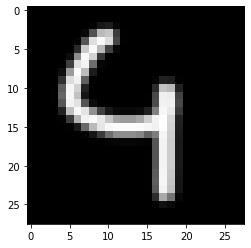

1/1 [==============================] - 0s 51ms/step
------------------------
Predvidjen je broj:  4


In [47]:
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np

filename = 'test.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = load_model(filepath="model")

# TODO: napravi predikciju 
prediction = model.predict(img)
sol = np.argmax(prediction, axis=1)

# TODO: ispis rezultat
print("------------------------")
print("Predvidjen je broj: ", sol[0])

<ipython-input-48-e3f2baa6a426>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)


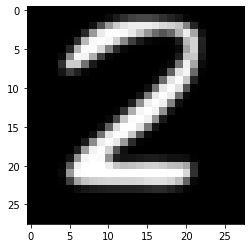

1/1 [==============================] - 0s 43ms/step
------------------------
Predvidjen je broj:  2


In [48]:
filename = 'test1.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = load_model(filepath="model")

# TODO: napravi predikciju 
prediction = model.predict(img)
sol = np.argmax(prediction, axis=1)

# TODO: ispis rezultat
print("------------------------")
print("Predvidjen je broj: ", sol[0])